># **Project:** Classification Breast cancer dignosis

# **1. Collect and Explore data :**

In [37]:
#H: importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*tight_layout.*")
warnings.filterwarnings("ignore", category=RuntimeWarning, module="pandas.io.formats.format")
warnings.filterwarnings("ignore", category=UserWarning, message=".*The figure layout has changed to tight.*")

***- Charge the dataset and explore its caracteristics.***



In [38]:
#H: uploading the dataset
my_ds = pd.read_csv('/kaggle/input/cancer-ds/Breast Cancer Wisconsin.csv')
print(my_ds.shape)
my_ds.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [39]:
#H: dataset informations
my_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [40]:
#H: dataset columns
my_ds.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [41]:
#H: check the examples counts
my_ds['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [42]:
#H: colomns statistics
my_ds.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


***- Visualise the relations between the caractéristics and the tumors' classes.***

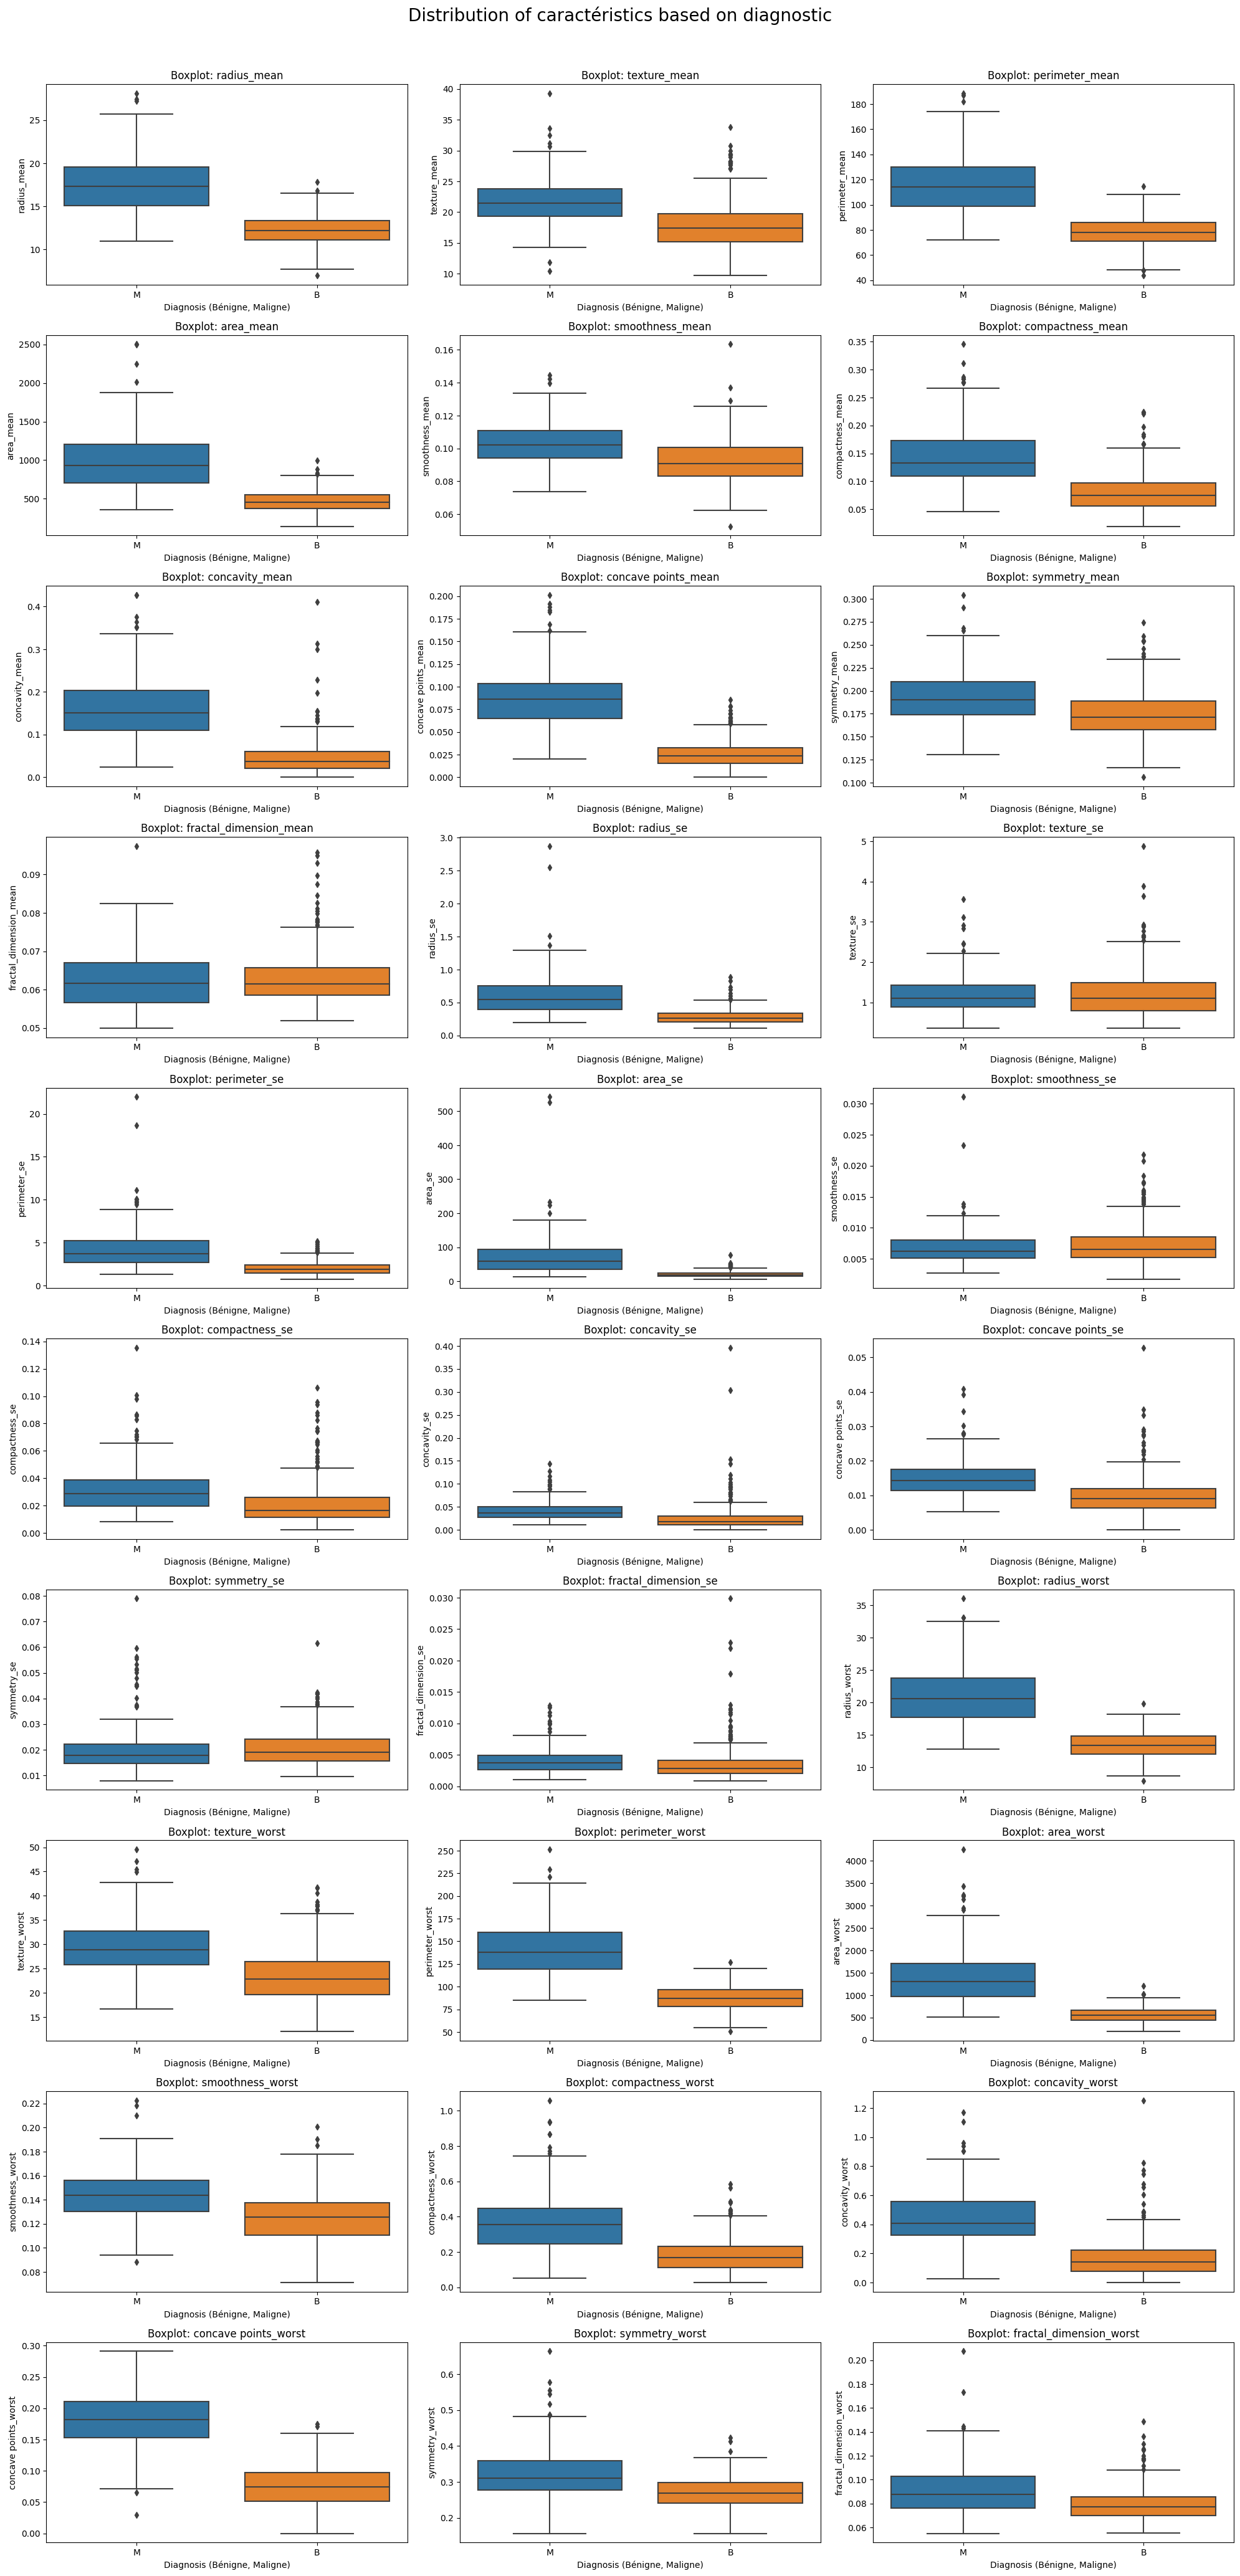

In [43]:
features = my_ds.columns.drop(['id', 'diagnosis','Unnamed: 32'])

n_cols = 3
n_rows = int(len(features) / n_cols) + 1
plt.figure(figsize=(20, n_rows * 4))

for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x='diagnosis', y=feature, data=my_ds)
    plt.title(f'Boxplot: {feature}')
    plt.xlabel('Diagnosis (Bénigne, Maligne)')
    plt.tight_layout()

plt.suptitle("Distribution of caractéristics based on diagnostic", fontsize=20, y=1.02)
plt.show()

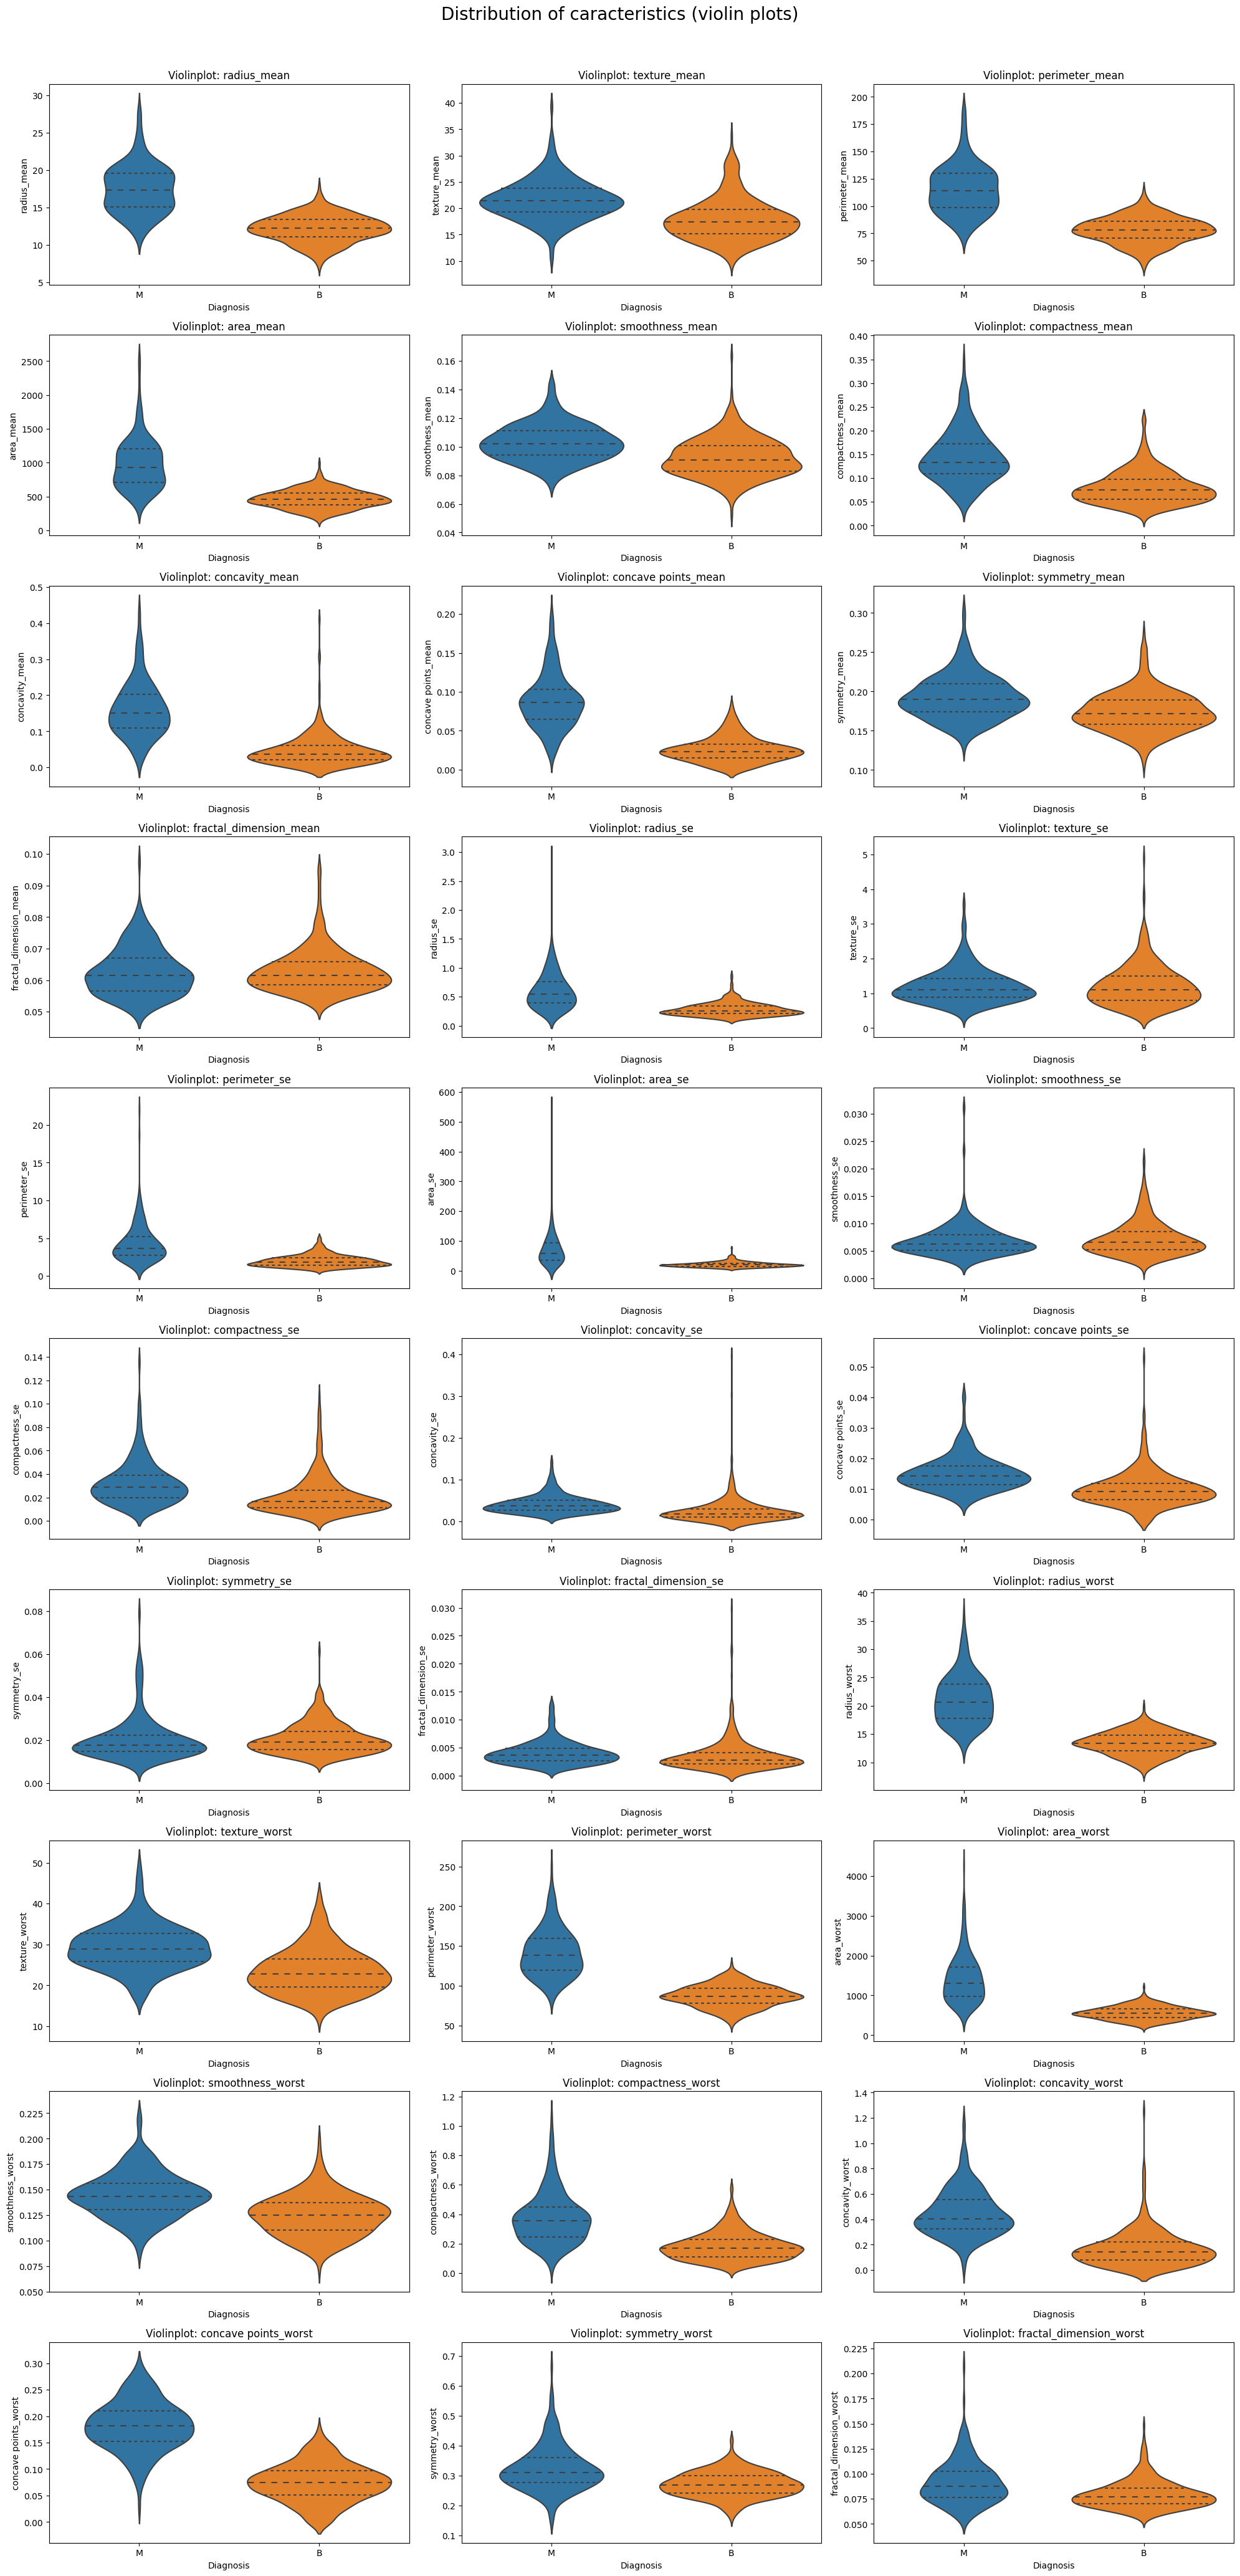

In [44]:
plt.figure(figsize=(20, n_rows * 4))
for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.violinplot(x='diagnosis', y=feature, data=my_ds, inner='quartile')
    plt.title(f'Violinplot: {feature}')
    plt.xlabel('Diagnosis')
    plt.tight_layout()
plt.suptitle("Distribution of caracteristics (violin plots)", fontsize=20, y=1.02)
plt.show()


According to the two plots (box and violin) the characteristics of the group _se have very close or identical medians between the two classes sometimes (Bégnine and Maline), so I will eliminate them from the final features on which the models will be based.

In [45]:
#H: remove all colomns _se
my_filtred_ds = my_ds.loc[:, ~my_ds.columns.str.endswith('_se')]

#H: redefine the usefull features
features = my_filtred_ds.columns.drop(['id', 'diagnosis', 'Unnamed: 32'])

#H: check
my_filtred_ds.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
       'Unnamed: 32'],
      dtype='object')

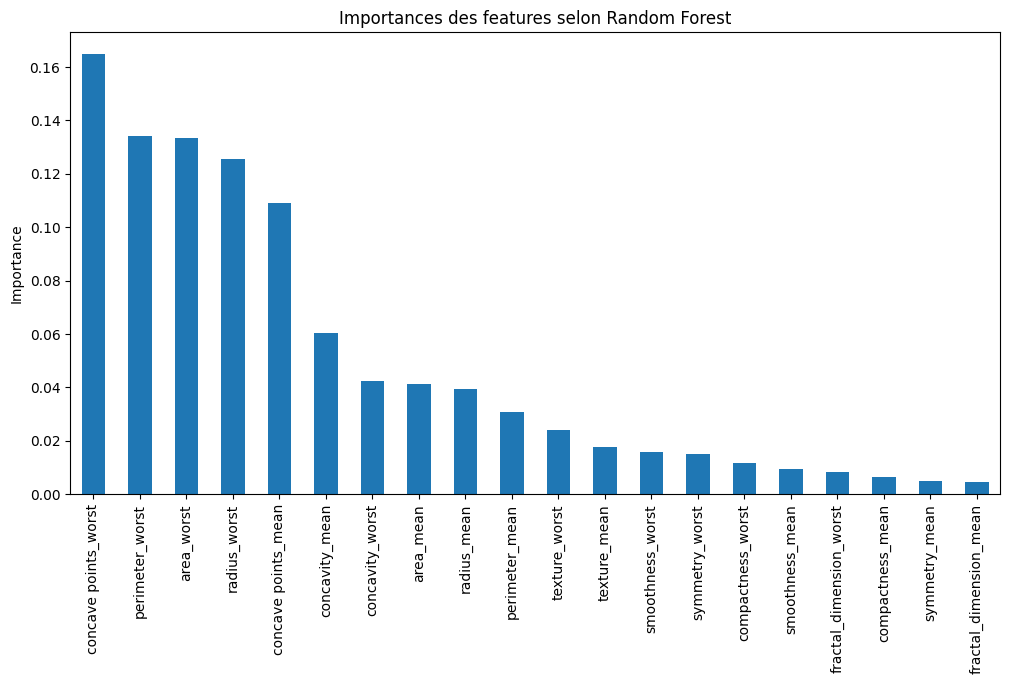

In [46]:
#H: check the importance of each feature by RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#H: specify the axes
X = my_filtred_ds[features]
y = my_filtred_ds['diagnosis'].map({'B':0, 'M':1})

#H: train
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

#H: get resutls
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)

#H: visualise
plt.figure(figsize=(12,6))
importances.plot(kind='bar')
plt.title("Importances des features selon Random Forest")
plt.ylabel("Importance")
plt.show()

As we have the importance between 0 and 0.16 with 20 features, so the most important features are with an importance >= 0.05 and which are: concavity_mean, concave_points_mean, radius_worst, area_worst, perimeter_worst, concave_points_worst

# **2. Prétraitement des Données :**

***- Check for missing values or outliers.***

In [47]:
#H: confirm the numbers of nu values
my_filtred_ds.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: int64

In [48]:
#H: drop id & unnamed
my_filtred_ds = my_filtred_ds.drop(['id', 'Unnamed: 32'], axis=1)
my_filtred_ds.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [49]:
#H: Detection of number of abnormal values for each of the features
Q1 = my_filtred_ds[features].quantile(0.25)
Q3 = my_filtred_ds[features].quantile(0.75)
IQR = Q3 - Q1

outliers = ((my_filtred_ds[features] < (Q1 - 1.5 * IQR)) | (my_filtred_ds[features] > (Q3 + 1.5 * IQR)))
print("Nombre de valeurs aberrantes par caractéristique :")
print(outliers.sum().sort_values(ascending=False))

Nombre de valeurs aberrantes par caractéristique :
area_worst                 35
area_mean                  25
fractal_dimension_worst    24
symmetry_worst             23
concavity_mean             18
radius_worst               17
compactness_mean           16
compactness_worst          16
symmetry_mean              15
fractal_dimension_mean     15
perimeter_worst            15
radius_mean                14
perimeter_mean             13
concavity_worst            12
concave points_mean        10
texture_mean                7
smoothness_worst            7
smoothness_mean             6
texture_worst               5
concave points_worst        0
dtype: int64


***- Normalise the data if necessary.***



In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

***- Division of data into training and test sets.***

In [51]:
from sklearn.model_selection import train_test_split
import joblib

X = my_filtred_ds[features]
y = my_filtred_ds['diagnosis'].map({'B': 0, 'M': 1})

#H: on a donné 20% de data pour le test et les 80% restantes pour l'entrainement, satisfy=y permet d'équilibrer les classes dans les parties de data
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#H: Normaliser les données par le scaler prédéfinit
X_train_val_scaled = scaler.fit_transform(X_train_val)
X_train_val_scaled = pd.DataFrame(X_train_val_scaled, columns=X_train_val.columns, index=X_train_val.index)


#H: training+validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val_scaled, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)


print("The sizes of the dataset parts:\n")
print(f"Original: {len(X)}")
print(f"Training: {len(X_train)} ({len(X_train)/len(X):.2f} of original)")
print(f"Validation: {len(X_val)} ({len(X_val)/len(X):.2f} of original)")
print(f"Test : {len(X_test)} ({len(X_test)/len(X):.2f} of original)")

print("\nTaille de X_train_scaled:", X_train.shape)
print("Taille de X_val_scaled:", X_val.shape)
print("Taille de X_test_scaled:", X_test_scaled.shape)

X_train.head()

The sizes of the dataset parts:

Original: 569
Training: 341 (0.60 of original)
Validation: 114 (0.20 of original)
Test : 114 (0.20 of original)

Taille de X_train_scaled: (341, 20)
Taille de X_val_scaled: (114, 20)
Taille de X_test_scaled: (114, 20)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
194,0.194096,0.884826,0.331476,0.032836,0.588154,1.748625,0.986613,1.003104,-0.282343,0.575215,-0.055460,0.308771,0.314587,-0.181998,-0.020594,1.322606,0.867351,0.856807,0.137140,0.159037
46,-1.669883,-0.601431,-1.640582,-1.271249,-0.699103,-0.824588,-0.898247,-1.087161,-0.166468,0.332502,-1.508996,-0.649593,-1.482214,-1.114600,-0.101599,-0.757332,-0.974193,-1.345668,0.303875,-0.552861
332,-0.824044,0.103200,-0.821220,-0.756281,0.658114,-0.669345,-1.031493,-1.045135,0.452742,-0.349682,-0.892939,-0.020564,-0.906617,-0.781270,0.439855,-1.003878,-1.235956,-1.426841,0.600823,-1.041602
76,-0.177916,-1.978026,-0.174398,-0.278811,2.316157,0.016066,-0.250150,0.417367,2.129315,0.530694,-0.463986,-2.208993,-0.483340,-0.490057,0.554967,-0.743428,-0.895877,-0.620346,-0.323367,-0.672980
124,-0.222670,-0.706425,-0.247707,-0.294643,-1.738003,-0.567954,-0.101268,-0.530105,-1.422992,-0.644098,-0.427219,-0.519506,-0.464886,-0.444330,-1.261248,-0.015354,0.262630,-0.385062,-1.374593,-0.432191


In [52]:
joblib.dump(scaler, 'fitted_scaler.pkl')

['fitted_scaler.pkl']

# **3. Models Building and Training:**

In [53]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [54]:
models = {}
best_params = {}

***- Optimisation of hyperparametres to improve model performance.***


To optimize the models and ensure their performance, GridSearchCV was used. This function automatically tests multiple hyperparameter combinations and then selects the one that yields the best results. This allows us to obtain the most reliable version of each model.

For each algorithm, we defined a grid of hyperparameters to explore, then configured GridSearchCV by associating it with the model and options to test. The best combination identified was retrieved with the model trained with these optimal parameters, and it was saved for easy use when integrating with an interface.

- Logistic Regression:

In [55]:
#H: Defining hyperparameters to optimize with GridSearchCV
param_grid_lreg = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'eta0': [0.001, 0.01, 0.1],
    'max_iter': [1000, 2000]
}

#H: utilise GridSearchCV on the training set (X_train, y_train)
grid_search_lreg = GridSearchCV(SGDClassifier(loss='log_loss', random_state=42),
                                param_grid_lreg,
                                cv=5,
                                scoring='accuracy',
                                n_jobs=-1,
                                verbose=1)

grid_search_lreg.fit(X_train, y_train)

best_lreg_model = grid_search_lreg.best_estimator_
best_params['LogisticRegression_SGD'] = grid_search_lreg.best_params_
models['LogisticRegression_SGD'] = best_lreg_model

print(f"Best hyperparametres for (SGD) : {best_params['LogisticRegression_SGD']}")
print(f"Accuracy for (SGD) : {grid_search_lreg.best_score_:.4f}")

joblib.dump(best_lreg_model, 'best_logistic_regression_model.pkl')

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best hyperparametres for (SGD) : {'alpha': 0.01, 'eta0': 0.001, 'max_iter': 1000, 'penalty': 'l2'}
Accuracy for (SGD) : 0.9707


['best_logistic_regression_model.pkl']

- KNN

In [56]:
#H: definition of hyperparametres to optimise
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 25],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'minkowski']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(),
                               param_grid_knn,
                               cv=5,
                               scoring='accuracy',
                               n_jobs=-1,
                               verbose=1)
grid_search_knn.fit(X_train, y_train)

best_knn_model = grid_search_knn.best_estimator_
best_params['KNeighborsClassifier'] = grid_search_knn.best_params_
models['KNeighborsClassifier'] = best_knn_model

print(f"Best hyperparametres for KNN : {best_params['KNeighborsClassifier']}")
print(f"Accuracy for KNN : {grid_search_knn.best_score_:.4f}")

joblib.dump(best_knn_model, 'best_knn_model.pkl')

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best hyperparametres for KNN : {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Accuracy for KNN : 0.9590


['best_knn_model.pkl']

- Arbre de décision

In [57]:
#H: definition of hyperparametres to optimise
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              param_grid_dt,
                              cv=5,
                              scoring='accuracy',
                              n_jobs=-1,
                              verbose=1)
grid_search_dt.fit(X_train, y_train)

best_dt_model = grid_search_dt.best_estimator_
best_params['DecisionTreeClassifier'] = grid_search_dt.best_params_
models['DecisionTreeClassifier'] = best_dt_model

print(f"Best hyperparametres for Decision Tree : {best_params['DecisionTreeClassifier']}")
print(f"Accuracy for Decision Tree : {grid_search_dt.best_score_:.4f}")

joblib.dump(best_dt_model, 'best_decision_tree_model.pkl')

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best hyperparametres for Decision Tree : {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4}
Accuracy for Decision Tree : 0.9298


['best_decision_tree_model.pkl']

# **5. Model Evaluation :**

In this section, we study the performance of each model in more detail so that we can compare them and determine which one is best suited to our case.

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [59]:
#H: definir an evaluation function

def model_evaluation_metrics(model, X_test, y_test):
    #H: predictions
    y_pred = model.predict(X_test)
    model_metrics = {}

    #H: metrics
    model_metrics['accuracy'] = accuracy_score(y_test, y_pred)
    model_metrics['precision'] = precision_score(y_test, y_pred)
    model_metrics['recall'] = recall_score(y_test, y_pred)
    model_metrics['f1'] = f1_score(y_test, y_pred)
    model_metrics['c_matrix'] = confusion_matrix(y_test, y_pred)
    model_metrics['class_report'] = classification_report(y_test, y_pred, target_names=['Bénigne (0)', 'Maligne (1)'])

    #H: return the values
    return model_metrics

#H: a function for matrix ploting
def plot_confusion_matrix(matrix, model_name):
  plt.figure(figsize=(7, 6))
  sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
              xticklabels=['Predicted Benign', 'Predicted Malignant'],
              yticklabels=['Real Benign', 'Real Malignant'])
  plt.title(f'Confusion matrix for {model_name}', fontsize=14)
  plt.xlabel('Prediction', fontsize=12)
  plt.ylabel('True Value', fontsize=12)
  plt.show()

- Evaluation of SGD

Accuracy: 0.9825
Precision: 1.0000
Recall: 0.9524
F1 Score: 0.9756
Classification repport :
               precision    recall  f1-score   support

 Bénigne (0)       0.97      1.00      0.99        72
 Maligne (1)       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



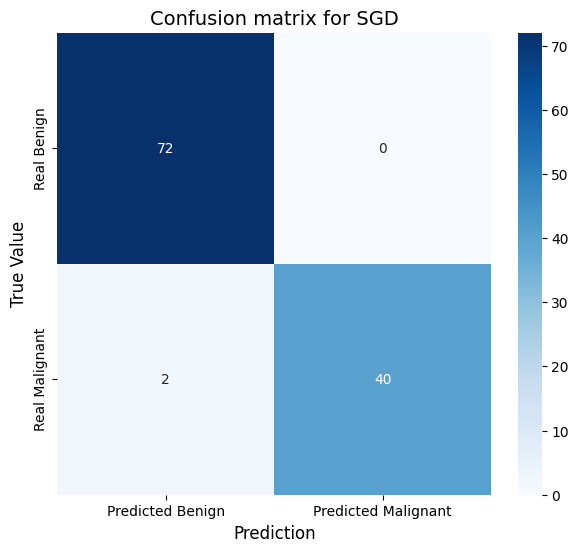

In [60]:
sgd_metrics = model_evaluation_metrics(best_lreg_model, X_test_scaled, y_test)

print(f"Accuracy: {sgd_metrics['accuracy']:.4f}")
print(f"Precision: {sgd_metrics['precision']:.4f}")
print(f"Recall: {sgd_metrics['recall']:.4f}")
print(f"F1 Score: {sgd_metrics['f1']:.4f}")
print(f"Classification repport :\n",sgd_metrics['class_report'] )

plot_confusion_matrix(sgd_metrics['c_matrix'], "SGD")

- Evaluation of KNN

Accuracy: 0.9649
Precision: 0.9750
Recall: 0.9286
F1 Score: 0.9512
Classification repport :
               precision    recall  f1-score   support

 Bénigne (0)       0.96      0.99      0.97        72
 Maligne (1)       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



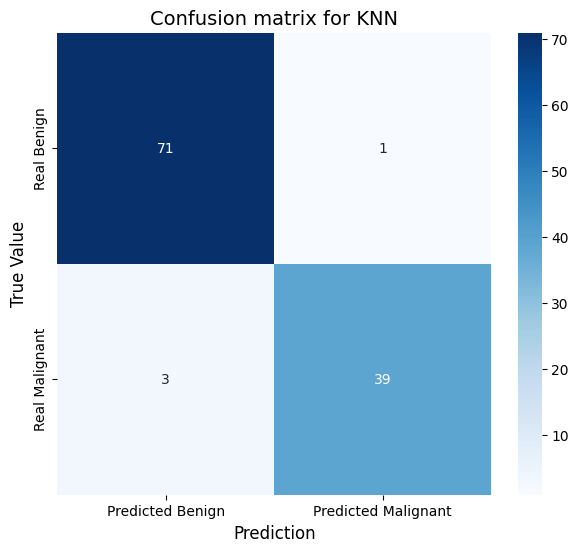

In [61]:
knn_metrics = model_evaluation_metrics(best_knn_model, X_test_scaled, y_test)

print(f"Accuracy: {knn_metrics['accuracy']:.4f}")
print(f"Precision: {knn_metrics['precision']:.4f}")
print(f"Recall: {knn_metrics['recall']:.4f}")
print(f"F1 Score: {knn_metrics['f1']:.4f}")
print(f"Classification repport :\n",knn_metrics['class_report'] )

plot_confusion_matrix(knn_metrics['c_matrix'], "KNN")

- Evaluation of Decision Tree

Accuracy: 0.9649
Precision: 0.9750
Recall: 0.9286
F1 Score: 0.9512
Classification repport :
               precision    recall  f1-score   support

 Bénigne (0)       0.96      0.99      0.97        72
 Maligne (1)       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



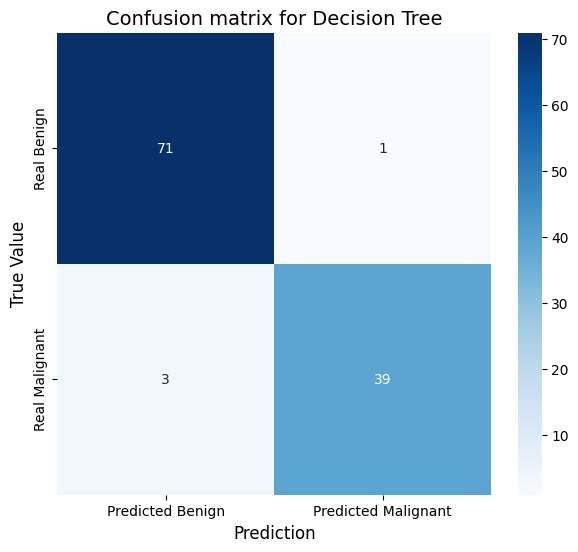

In [62]:
dt_metrics = model_evaluation_metrics(best_knn_model, X_test_scaled, y_test)

print(f"Accuracy: {dt_metrics['accuracy']:.4f}")
print(f"Precision: {dt_metrics['precision']:.4f}")
print(f"Recall: {dt_metrics['recall']:.4f}")
print(f"F1 Score: {dt_metrics['f1']:.4f}")
print(f"Classification repport :\n",dt_metrics['class_report'] )

plot_confusion_matrix(dt_metrics['c_matrix'], "Decision Tree")

***- Comparaison between models.***

In [63]:
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree'],
    'Accuracy': [sgd_metrics['accuracy'], knn_metrics['accuracy'], dt_metrics['accuracy']],
    'Precision': [sgd_metrics['precision'], knn_metrics['precision'], dt_metrics['precision']],
    'Recall': [sgd_metrics['recall'], knn_metrics['recall'], dt_metrics['recall']],
    'F1 Score': [sgd_metrics['f1'], knn_metrics['f1'], dt_metrics['f1']]
})

# Affichage
print(comparison_df.sort_values(by='Accuracy', ascending=False))

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.982456      1.000  0.952381   0.97561
1                  KNN  0.964912      0.975  0.928571   0.95122
2        Decision Tree  0.964912      0.975  0.928571   0.95122


We see that logistic regression gives the best results in our case, with perfect precision (1.00) and an accuracy of 98.25%. It was able to distinguish cases well without generating false positives, which is very important in a medical context. Its recall is also high (0.95), meaning it detects malignant tumors very well.

The KNN and the decision tree achieved fairly similar results, with an accuracy of 96.49%. Their precision is also good, but their slightly lower recall (0.93) shows that they missed some cases. They remain reliable, but slightly less so than regression.

In summary, each model has its strengths, but here, logistic regression is the most suited to our case study.

# **6. Test the models on the test dataset**

***- Logistic regression:***

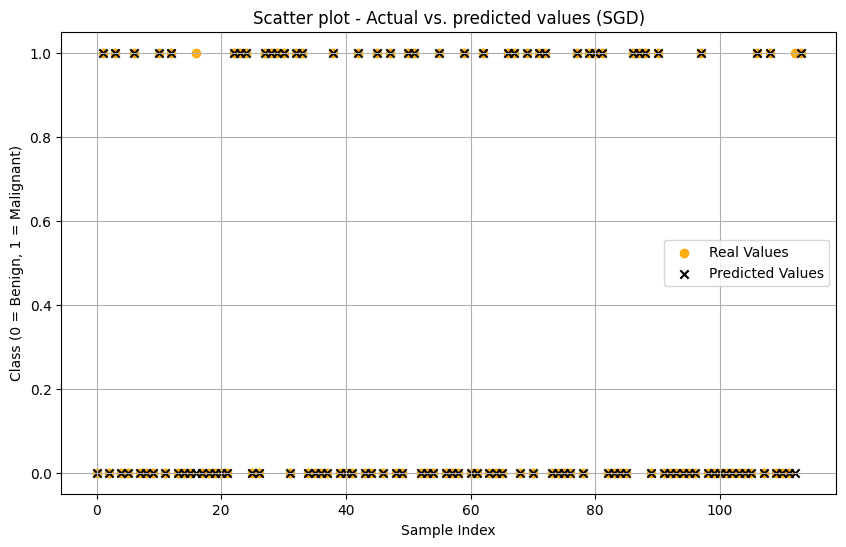

In [64]:
y_pred_sgd = best_lreg_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='orange', label='Real Values', alpha=0.9)
plt.scatter(range(len(y_pred_sgd)), y_pred_sgd, color='black', label='Predicted Values', alpha=1, marker='x')
plt.title("Scatter plot - Actual vs. predicted values (SGD)")
plt.xlabel("Sample Index")
plt.ylabel("Class (0 = Benign, 1 = Malignant)")
plt.legend()
plt.grid(True)
plt.show()

In [65]:
comparison_df_sgd = pd.DataFrame({
    'Real': y_test[:20].values,
    'Predicted': y_pred_sgd[:20]
})
comparison_df_sgd

,Real,Predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


***- Knn***

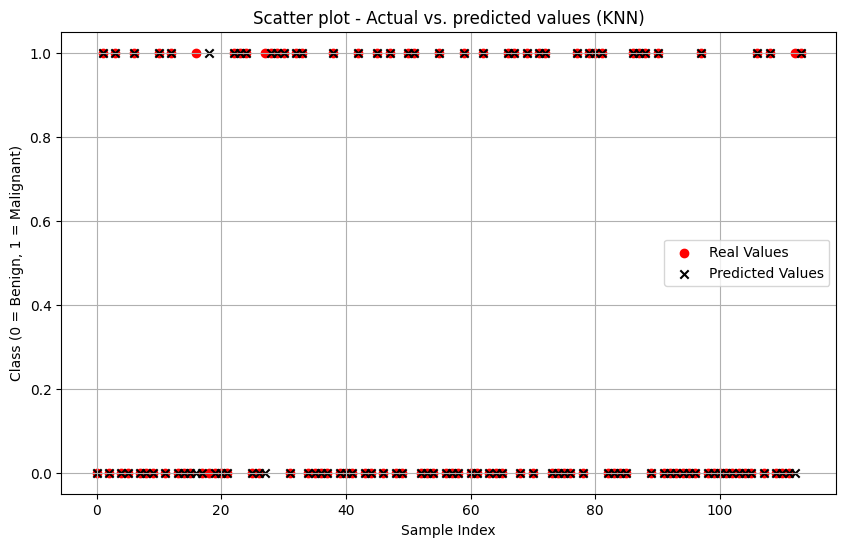

In [66]:
y_pred_knn = best_knn_model.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Real Values', alpha=1)
plt.scatter(range(len(y_pred_knn)), y_pred_knn, color='black', label='Predicted Values', alpha=1, marker='x')
plt.title("Scatter plot - Actual vs. predicted values (KNN)")
plt.xlabel("Sample Index")
plt.ylabel("Class (0 = Benign, 1 = Malignant)")
plt.legend()
plt.grid(True)
plt.show()

In [67]:
comparison_df_knn = pd.DataFrame({
    'Real': y_test[:20].values,
    'Predicted': y_pred_knn[:20]
})
comparison_df_knn

,Real,Predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


***- Decision Tree***

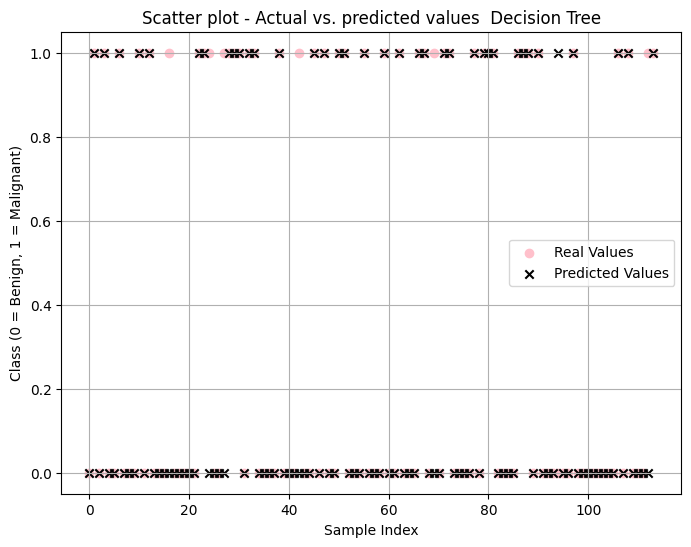

In [68]:
y_pred_dt = best_dt_model.predict(X_test_scaled)

plt.figure(figsize=(8,6))
plt.scatter(range(len(y_test)), y_test, color='pink', label='Real Values')
plt.scatter(range(len(y_pred_dt)), y_pred_dt, color='black', alpha=1, marker= 'x', label='Predicted Values')
plt.title("Scatter plot - Actual vs. predicted values  Decision Tree")
plt.xlabel("Sample Index")
plt.ylabel("Class (0 = Benign, 1 = Malignant)")
plt.legend()
plt.grid(True)
plt.show()

In [69]:
comparison_df_dt = pd.DataFrame({
    'Real': y_test[:20].values,
    'Predicted': y_pred_dt[:20]
})
comparison_df_dt

,Real,Predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0


# **7. Interpretation of Results :**

At first we eliminated all _se features, and the Random Forest algorithm classified `[concavity_mean, concave_points_mean, radius_worst, area_worst, perimeter_worst, concave_points_worst]` as the most important features in the dataset and which most affect the classification results. In this part, we will verify this probability by determining the important features for each of the models.

- SGD

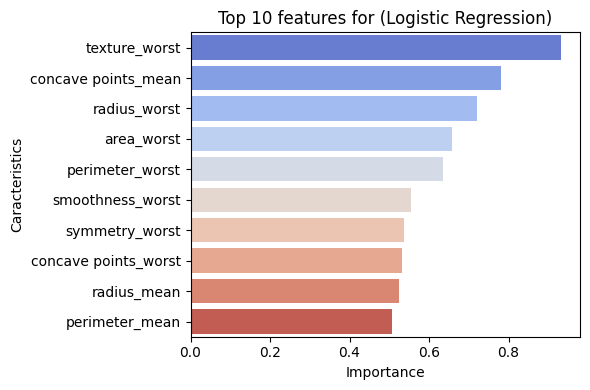

In [70]:
coefs = best_lreg_model.coef_[0]  # vecteur de poids
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefs})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

#H: visualise just the 10 most importantes features
plt.figure(figsize=(6, 4))
sns.barplot(data=coef_df.head(10), x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Top 10 features for (Logistic Regression)")
plt.xlabel("Importance")
plt.ylabel("Caracteristics")
plt.tight_layout()
plt.show()

- Knn

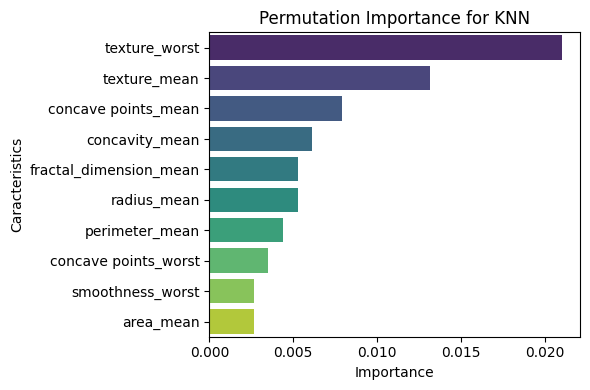

In [71]:
from sklearn.inspection import permutation_importance

# Calculate permutation importances on the test set
result = permutation_importance(best_knn_model, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Extract and sort
importances = pd.DataFrame({
    'feature': features,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values(by='importance_mean', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(data=importances.head(10), x='importance_mean', y='feature', palette='viridis')
plt.title("Permutation Importance for KNN")
plt.xlabel("Importance")
plt.ylabel("Caracteristics")
plt.tight_layout()
plt.show()


- Decision Tree

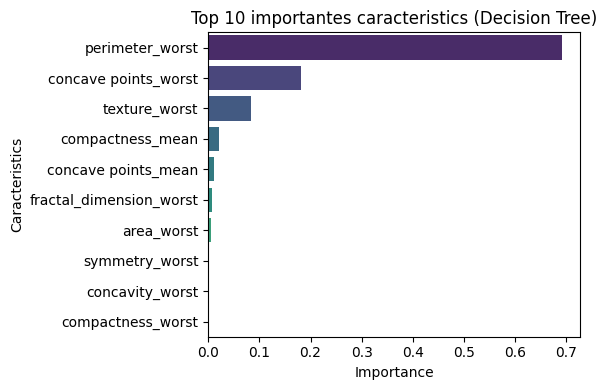

In [72]:
importances = best_dt_model.feature_importances_
feature_names = features  # ou ta liste `features`
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Affichage
plt.figure(figsize=(6, 4))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 importantes caracteristics (Decision Tree)")
plt.xlabel("Importance")
plt.ylabel("Caracteristics")
plt.tight_layout()
plt.show()

Each of the models is affected more by certain characteristics and this is due to the nature of each one.